<a href="https://colab.research.google.com/github/chaimajaballah0/Tunisian-House-Rent-Predicition/blob/main/RandomForest_Xgboost_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the training dataset as a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,Appartements,Ben arous,El Mourouj,110.0,3.0,1.0,580.0
1,7628,Appartements,Sousse,Hammam Sousse,40.0,1.0,1.0,650.0
2,10843,Appartements,Tunis,Le Bardo,75.0,1.0,1.0,570.0
3,9401,Appartements,Médenine,Autres villes,55.0,2.0,1.0,350.0
4,10911,Appartements,Sousse,Sousse,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,Maisons et Villas,Sfax,Route el Afrane,90.0,2.0,1.0,400.0
2135,11113,Appartements,Monastir,Autres villes,60.0,1.0,1.0,350.0
2136,7148,Appartements,Ariana,Ghazela,70.0,2.0,1.0,350.0
2137,12143,Maisons et Villas,Ariana,Jardins D'el Menzah,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,Maisons et Villas,Sfax,Autres villes,280.0,8.0,2.0
1,1118,Appartements,Ariana,La Soukra,150.0,3.0,1.0
2,2028,Appartements,Sousse,Autres villes,120.0,2.0,1.0
3,8331,Appartements,Sousse,Sahloul,160.0,3.0,2.0
4,5371,Appartements,Sousse,Sahloul,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,Appartements,Ben arous,Boumhel,130.0,4.0,1.0
531,3056,Appartements,Ariana,Jardins D'el Menzah,70.0,1.0,1.0
532,11645,Maisons et Villas,Tunis,Mutuelleville,200.0,4.0,3.0
533,6562,Appartements,Ariana,Autres villes,70.0,2.0,1.0


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  5


,Id,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,110.0,3.0,1.0,580.0
1,7628,40.0,1.0,1.0,650.0
2,10843,75.0,1.0,1.0,570.0
3,9401,55.0,2.0,1.0,350.0
4,10911,140.0,2.0,1.0,550.0


In [ ]:
# Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


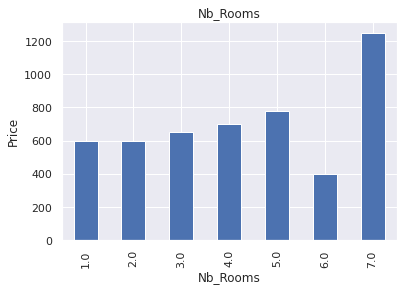

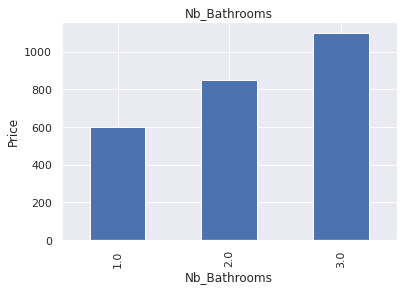

In [ ]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


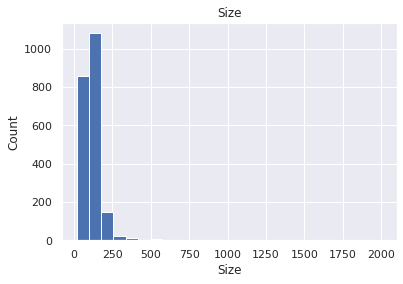

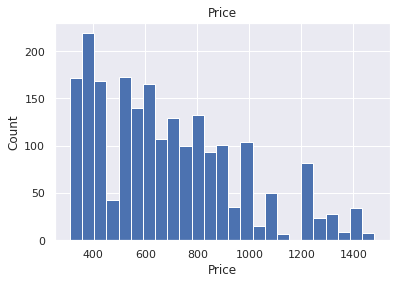

In [ ]:
for feature in continuous_feature:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

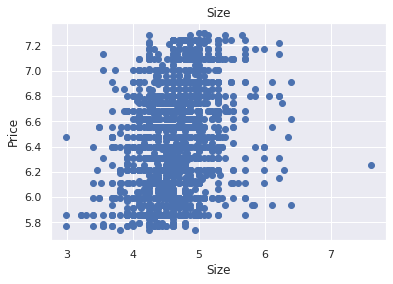

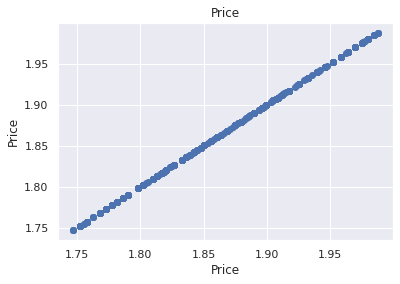

In [ ]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

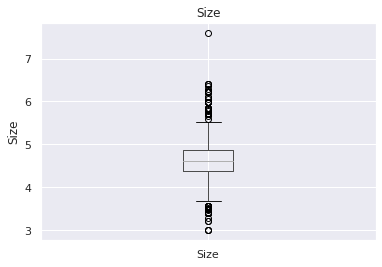

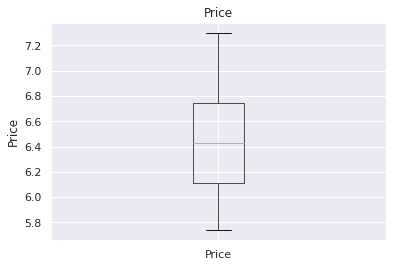

In [ ]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [ ]:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
categorical_features

['Type', 'Governorate', 'City']

In [ ]:
# In order to encode the categorical variables 
df_test.set_index(df_test.index+len(df_train),inplace=True)
df = df_train.append(df_test)

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is Type and number of categories are 2
The feature is Governorate and number of categories are 22
The feature is City and number of categories are 122


In [ ]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [ ]:
df.head(5)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0


In [ ]:
# Get back to train and test data, after being encoded by "get_dummies"
df_train = df[:len(df_train)].copy()
df_test = df[len(df_train):len(df)].copy()
df_test.drop(columns=['Price'], inplace=True)
df_test.reset_index(drop=True, inplace=True)
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,0,8,31,90.0,2.0,1.0,400.0
2135,11113,1,14,68,60.0,1.0,1.0,350.0
2136,7148,1,21,79,70.0,2.0,1.0,350.0
2137,12143,0,21,104,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,0,8,68,280.0,8.0,2.0
1,1118,1,21,112,150.0,3.0,1.0
2,2028,1,19,68,120.0,2.0,1.0
3,8331,1,19,101,160.0,3.0,2.0
4,5371,1,19,101,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,1,15,85,130.0,4.0,1.0
531,3056,1,21,104,70.0,1.0,1.0
532,11645,0,20,107,200.0,4.0,3.0
533,6562,1,21,68,70.0,2.0,1.0


In [ ]:
df_train.head()

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0


In [ ]:
cols = ['Price','Size', 'Nb_Rooms', 'Nb_Bathrooms'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df_train[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df_train[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df_train[cols] < (Q1 - 1.5 * IQR)) | (df_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = df_train[condition]

In [ ]:
scaling_feature=[feature for feature in filtered_df.columns if feature not in ['Id','Price'] ]
len(scaling_feature)

6

In [ ]:
scaling_feature

['Type', 'Governorate', 'City', 'Size', 'Nb_Rooms', 'Nb_Bathrooms']

In [ ]:
feature_scale=[feature for feature in filtered_df.columns if feature not in ['Id','Price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(filtered_df[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(filtered_df[feature_scale])

array([[1.        , 0.71428571, 0.38842975, 0.48648649, 0.66666667,
        0.        ],
       [1.        , 0.9047619 , 0.80991736, 0.10810811, 0.        ,
        0.        ],
       [1.        , 0.95238095, 0.62809917, 0.2972973 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.38095238, 0.25619835, 0.37837838, 0.33333333,
        0.        ],
       [1.        , 0.66666667, 0.56198347, 0.21621622, 0.        ,
        0.        ],
       [1.        , 1.        , 0.65289256, 0.27027027, 0.33333333,
        0.        ]])

In [ ]:
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)
X_train = filtered_df.drop(['Id','Price'],axis=1)
y_train = filtered_df['Price']
X_test = filtered_df.drop(['Id'],axis=1)
display(X_train)
display(y_train)
display(X_test)

,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,1,15,47,110.0,3.0,1.0
1,1,19,98,40.0,1.0,1.0
2,1,20,76,75.0,1.0,1.0
3,1,16,68,55.0,2.0,1.0
4,1,19,91,140.0,2.0,1.0
...,...,...,...,...,...,...
2131,1,20,117,75.0,3.0,1.0
2133,1,8,45,110.0,3.0,1.0
2134,0,8,31,90.0,2.0,1.0
2135,1,14,68,60.0,1.0,1.0


0       580.0
1       650.0
2       570.0
3       350.0
4       550.0
        ...  
2131    780.0
2133    500.0
2134    400.0
2135    350.0
2136    350.0
Name: Price, Length: 1759, dtype: float64

,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,1,15,47,110.0,3.0,1.0,580.0
1,1,19,98,40.0,1.0,1.0,650.0
2,1,20,76,75.0,1.0,1.0,570.0
3,1,16,68,55.0,2.0,1.0,350.0
4,1,19,91,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...
2131,1,20,117,75.0,3.0,1.0,780.0
2133,1,8,45,110.0,3.0,1.0,500.0
2134,0,8,31,90.0,2.0,1.0,400.0
2135,1,14,68,60.0,1.0,1.0,350.0


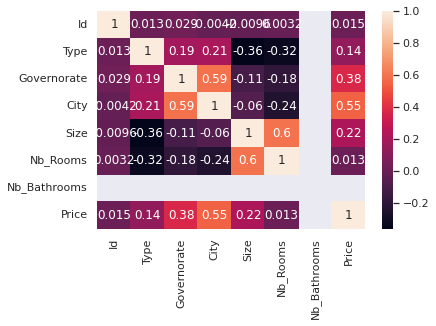

In [ ]:
sns.heatmap(filtered_df.corr(),annot=True)

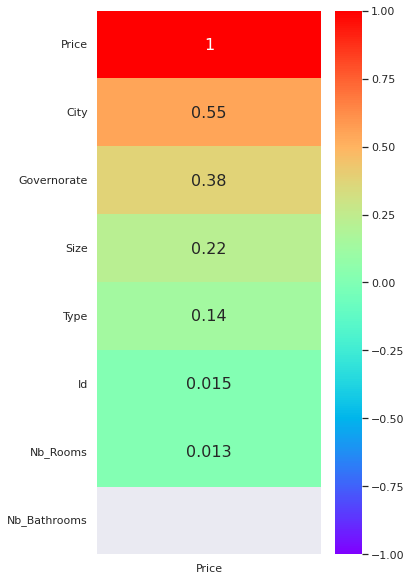

In [ ]:
top_features = filtered_df.corr()[['Price']].sort_values(by=['Price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=101)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=101))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True, False])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 6
selected features: 5


In [ ]:
selected_feat

Index(['Type', 'Governorate', 'City', 'Size', 'Nb_Rooms'], dtype='object')

In [ ]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X1_train,y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:04:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=1, learning_rate=0.15, max_depth=5, min_child_weight=2)

In [ ]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=5, min_child_weight=2, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X1_train,y1_train)

XGBRegressor(base_score=1, learning_rate=0.15, max_depth=5, min_child_weight=2,
             n_estimators=900, silent=True)

XGBRegressor(base_score=1, learning_rate=0.15, max_depth=5, min_child_weight=2,
             n_estimators=900, silent=True)
  Train R2 =  0.816
  Train RMSE =  1.088E+02
  Train MAPE =  0.106
XGBRegressor(base_score=1, learning_rate=0.15, max_depth=5, min_child_weight=2,
             n_estimators=900, silent=True)
  Test R2 =  0.317
  Test RMSE =  2.129E+02
  Test MAPE =  0.250


(1583, 5)

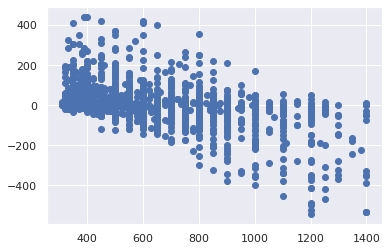

In [ ]:
y_XGB_predict = regressor.predict(X1_train)

print(regressor)
print('  Train R2 = ', '%.3f' %r2_score(y1_train, y_XGB_predict))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_train,y_XGB_predict)))
print('  Train MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_train,y_XGB_predict))
# Residuals plot
plt.scatter(y1_train, y_XGB_predict-y1_train)

y_XGB_predicted = regressor.predict(X1_test)

print(regressor)
print('  Test R2 = ', '%.3f' %r2_score(y1_test, y_XGB_predicted))
print('  Test RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_test,y_XGB_predicted)))
print('  Test MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_test,y_XGB_predicted))
X1_train.shape

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import auc, roc_auc_score
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'roc', 
            "eval_set" : [(X1_test,y1_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,}

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='r2',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
gs.fit(X1_train, y1_train, eval_set = (X1_test, y1_test))
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best score reached: 0.3897688852989052 with params: {'colsample_bytree': 0.4364296729504425, 'min_child_samples': 192, 'min_child_weight': 10.0, 'num_leaves': 10, 'reg_alpha': 2, 'reg_lambda': 50, 'subsample': 0.8327756184008888} 


In [ ]:
opt_parameters={'colsample_bytree': 0.4364296729504425, 'min_child_samples': 192, 'min_child_weight': 10.0, 'num_leaves': 10, 'reg_alpha': 2, 'reg_lambda': 50, 'subsample': 0.8327756184008888}

In [ ]:
LGBM= LGBMRegressor(**clf.get_params())
#set optimal parameters
LGBM.set_params(**opt_parameters)

LGBMRegressor(colsample_bytree=0.4364296729504425, metric='None',
              min_child_samples=192, min_child_weight=10.0, n_estimators=5000,
              n_jobs=4, num_leaves=10, random_state=314, reg_alpha=2,
              reg_lambda=50, subsample=0.8327756184008888)

In [ ]:
LGBM.fit(X1_train,y1_train)

LGBMRegressor(colsample_bytree=0.4364296729504425, metric='None',
              min_child_samples=192, min_child_weight=10.0, n_estimators=5000,
              n_jobs=4, num_leaves=10, random_state=314, reg_alpha=2,
              reg_lambda=50, subsample=0.8327756184008888)

LGBMRegressor(colsample_bytree=0.4364296729504425, metric='None',
              min_child_samples=192, min_child_weight=10.0, n_estimators=5000,
              n_jobs=4, num_leaves=10, random_state=314, reg_alpha=2,
              reg_lambda=50, subsample=0.8327756184008888)
  Train R2 =  0.513
  Train RMSE =  1.768E+02
  Train MAPE =  0.222
LGBMRegressor(colsample_bytree=0.4364296729504425, metric='None',
              min_child_samples=192, min_child_weight=10.0, n_estimators=5000,
              n_jobs=4, num_leaves=10, random_state=314, reg_alpha=2,
              reg_lambda=50, subsample=0.8327756184008888)
  Test R2 =  0.384
  Test RMSE =  2.022E+02
  Test MAPE =  0.255


(1583, 5)

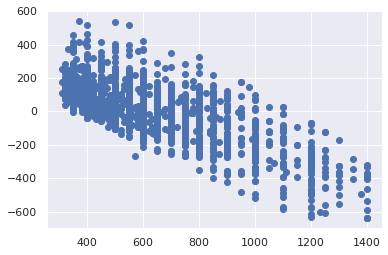

In [ ]:
y_lgbm_predict = LGBM.predict(X1_train)

print(LGBM)
print('  Train R2 = ', '%.3f' %r2_score(y1_train, y_lgbm_predict))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_train,y_lgbm_predict)))
print('  Train MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_train,y_lgbm_predict))
# Residuals plot
plt.scatter(y1_train, y_lgbm_predict-y1_train)

y_lgbm_predicted = LGBM.predict(X1_test)

print(LGBM)
print('  Test R2 = ', '%.3f' %r2_score(y1_test, y_lgbm_predicted))
print('  Test RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_test,y_lgbm_predicted)))
print('  Test MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_test,y_lgbm_predicted))
X1_train.shape

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X1_train, y1_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 70, bootstrap=True) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(max_depth=70, max_features='sqrt', min_samples_split=10)

RandomForestRegressor(max_depth=70, max_features='sqrt', min_samples_split=10)
  Train R2 =  0.647
  Train RMSE =  1.506E+02
  Train MAPE =  0.186
RandomForestRegressor(max_depth=70, max_features='sqrt', min_samples_split=10)
  Test R2 =  0.663
  Test RMSE =  1.496E+02
  Test MAPE =  0.179


(1583, 5)

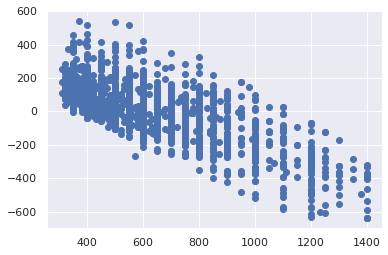

In [ ]:
y_randmf_predict = randmf.predict(X1_train)

print(randmf)
print('  Train R2 = ', '%.3f' %r2_score(y1_train, y_randmf_predict))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_train,y_randmf_predict)))
print('  Train MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_train,y_randmf_predict))
# Residuals plot
plt.scatter(y1_train, y_lgbm_predict-y1_train)

y_randmf_predicted = randmf.predict(X1_test)

print(randmf)
print('  Test R2 = ', '%.3f' %r2_score(y1_test, y_randmf_predicted))
print('  Test RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_test,y_randmf_predicted)))
print('  Test MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_test,y_randmf_predicted))
X1_train.shape

In [ ]:
y_predict=0.5*y_randmf_predict+0.5*y_XGB_predict

In [ ]:
print('  Train R2 = ', '%.3f' %r2_score(y1_train, y_predict))
print('  Test RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_train,y_predict)))
print('  Test MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_train,y_predict))
X1_train.shape

  Test R2 =  0.618
  Test RMSE =  1.566E+02
  Test MAPE =  0.193


(1583, 5)

In [ ]:
y_predicted=0.5*y_randmf_predicted+0.5*y_XGB_predicted

NameError: ignored

In [ ]:
print('  T R2 = ', '%.3f' %r2_score(y1_test, y_predicted))
print('  Test RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_test,y_predicted)))
print('  Test MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_test,y_predicted))
X1_train.shape

  Test R2 =  0.584
  Test RMSE =  1.661E+02
  Test MAPE =  0.199


(1583, 5)

In [ ]:
plt.hist(y_predicted-y1_test)
plt.show()
 
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(y_predicted-y1_test, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(y_predicted-y1_test, p)
 
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

NameError: ignored

In [ ]:
# Make predictions from the input test
y_test_pred = 0.4*regressor.predict(X_test)+0.6*randmf.predict(X_test)
# Add the predictions to the test data
df_test['Price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','Price']].copy()
df_subm

,Id,Price
0,10419,562.200819
1,1118,1017.965373
2,2028,755.187048
3,8331,886.094155
4,5371,640.914554
...,...,...
530,1586,714.729255
531,3056,845.938224
532,11645,1030.591978
533,6562,623.316415
